In [1]:
# Cargo las librerías necesarias
import scipy.io
import gpflow
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
import tensorflow as tf
from math import floor
import itertools

# Definición de funciones que utilizare
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    Función para graficar una matriz de confusion
    
    Parámetros:
    cm --      matriz de confusion
    classes -- etiquetas de las clases
    title --   título del grafico
    cmap --    colores a emplear para graficar
    """

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

def get_confusion_matrix_values(cm):
    """
    Retorna información de la matriz de confusion
    """
    return(cm[0][0], cm[1][0], cm[0][1], cm[1][1])

def get_stats(TP, FP, FN, TN):
    """
    Función para calcular estadísticas
    """
    accuracy=(TP+TN)/(TP+FN+FP+TN)
    accuracy = round(accuracy, 2)
    specificity=TN/(TN+FP)
    specificity = round(specificity, 2)
    sensitivity=(recall)=TP/(TP+FN)
    sensitivity = round(sensitivity, 2)
    precision=TP/(TP+FP)
    precision = round(precision, 2)
    F_score=(2*precision*sensitivity)/(precision+sensitivity)
    F_score = round(F_score, 2)
    return accuracy, specificity, sensitivity, precision, F_score

In [2]:
# Cargo los datos
mat = scipy.io.loadmat('Datos.mat')

# Reformateo los datos para manipularlos con Python
# Healthy_folds
hf1 = np.asarray(mat['Healthy_folds'][0,0][0]).reshape(203, 10) # Fold1
yhf1 = np.ones(hf1.shape[0])*-1
hf2 = np.asarray(mat['Healthy_folds'][0,1][0]).reshape(210, 10) # Fold2
yhf2 = np.ones(hf2.shape[0])*-1
hf3 = np.asarray(mat['Healthy_folds'][0,2][0]).reshape(206, 10) # Fold3
yhf3 = np.ones(hf3.shape[0])*-1
hf4 = np.asarray(mat['Healthy_folds'][0,3][0]).reshape(196, 10) # Fold4
yhf4 = np.ones(hf4.shape[0])*-1
hf5 = np.asarray(mat['Healthy_folds'][0,4][0]).reshape(199, 10) # Fold5
yhf5 = np.ones(hf5.shape[0])*-1

# Malignant_folds
mf1 = np.asarray(mat['Malign_folds'][0,0][0]).reshape(54, 10) # Fold1
ymf1 = np.ones(mf1.shape[0])
mf2 = np.asarray(mat['Malign_folds'][0,1][0]).reshape(72, 10) # Fold2
ymf2 = np.ones(mf2.shape[0])
mf3 = np.asarray(mat['Malign_folds'][0,2][0]).reshape(53, 10) # Fold3
ymf3 = np.ones(mf3.shape[0])
mf4 = np.asarray(mat['Malign_folds'][0,3][0]).reshape(50, 10) # Fold4
ymf4 = np.ones(mf4.shape[0])
mf5 = np.asarray(mat['Malign_folds'][0,4][0]).reshape(69, 10) # Fold5
ymf5 = np.ones(mf5.shape[0])

all_data = np.concatenate((hf1, hf2, hf3, hf4, hf5, mf1, mf2, mf3, mf4, mf5))
scaler = preprocessing.StandardScaler().fit(all_data)
hf1 = scaler.transform(hf1)
hf2 = scaler.transform(hf2)
hf3 = scaler.transform(hf3)
hf4 = scaler.transform(hf4)
hf5 = scaler.transform(hf5)
mf1 = scaler.transform(mf1)
mf2 = scaler.transform(mf2)
mf3 = scaler.transform(mf3)
mf4 = scaler.transform(mf4)
mf5 = scaler.transform(mf5)


# Reorganizo los datos para la cross validation
Healthy_folds = [hf1, hf2, hf3, hf4, hf5]
Malign_folds = [mf1, mf2, mf3, mf4, mf5]
Healthy_folds_labels = [yhf1, yhf2, yhf3, yhf4, yhf5]
Malign_folds_labels = [ymf1, ymf2, ymf3, ymf4, ymf5]

Text(0.5, 1.0, 'Curva PR kernel lineal')

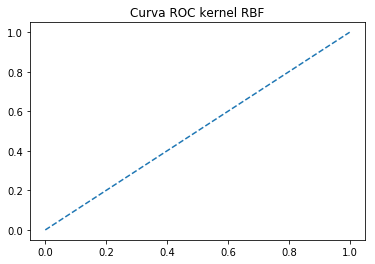

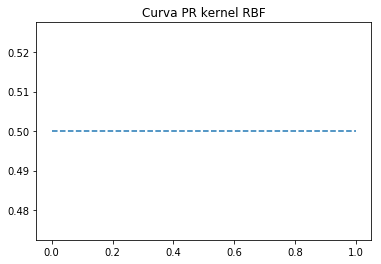

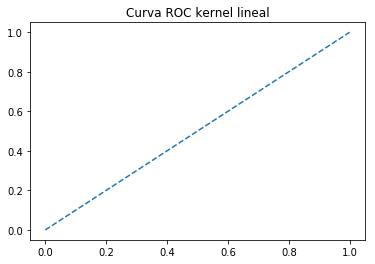

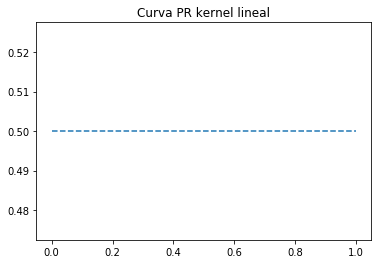

In [3]:
# Variables auxiliares
todos_indices = np.arange(0, 5)
promedio = []
promedio_lineal = []

# Inicializo los gráficos
fig1, ax1 = plt.subplots()
ax1.plot([0, 1], [0, 1], linestyle='--')
ax1.set_title("Curva ROC kernel RBF")

fig2, ax2 = plt.subplots()
ax2.plot([0, 1], [0.5, 0.5], linestyle='--')
ax2.set_title("Curva PR kernel RBF")

fig1lineal, ax1lineal = plt.subplots()
ax1lineal.plot([0, 1], [0, 1], linestyle='--')
ax1lineal.set_title("Curva ROC kernel lineal")

fig2lineal, ax2lineal = plt.subplots()
ax2lineal.plot([0, 1], [0.5, 0.5], linestyle='--')
ax2lineal.set_title("Curva PR kernel lineal")

Start_slice: 0, end_slice: 202
X_train shape (446, 10)
Enfermos 244, sanos 202
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 62.164530
  Number of iterations: 300
  Number of functions evaluations: 316


INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 62.164530
  Number of iterations: 300
  Number of functions evaluations: 316


                           class prior   transform  trainable          shape  \
VGP/kern/lengthscales  Parameter  None         +ve       True             ()   
VGP/kern/variance      Parameter  None         +ve       True             ()   
VGP/q_mu               Parameter  None      (none)       True       (446, 1)   
VGP/q_sqrt             Parameter  None  LoTri->vec       True  (1, 446, 446)   

                       fixed_shape  \
VGP/kern/lengthscales         True   
VGP/kern/variance             True   
VGP/q_mu                      True   
VGP/q_sqrt                    True   

                                                                   value  
VGP/kern/lengthscales                                 2.4648586350408412  
VGP/kern/variance                                      93.73817202674599  
VGP/q_mu               [[0.1970476983936659], [0.5036162401172357], [...  
VGP/q_sqrt             [[[0.09261099342510569, 0.0, 0.0, 0.0, 0.0, 0....  
INFO:tensorflow:Optimization term

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 150.796767
  Number of iterations: 121
  Number of functions evaluations: 132


                       class prior   transform  trainable          shape  \
VGP/kern/variance  Parameter  None         +ve       True             ()   
VGP/q_mu           Parameter  None      (none)       True       (446, 1)   
VGP/q_sqrt         Parameter  None  LoTri->vec       True  (1, 446, 446)   

                   fixed_shape  \
VGP/kern/variance         True   
VGP/q_mu                  True   
VGP/q_sqrt                True   

                                                               value  
VGP/kern/variance                                  1.819436803176824  
VGP/q_mu           [[0.4348892354057118], [-0.0721458036838547], ...  
VGP/q_sqrt         [[[0.10121552995272973, 0.0, 0.0, 0.0, 0.0, 0....  
Start_slice: 202, end_slice: 404
X_train shape (446, 10)
Enfermos 244, sanos 202
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 77.344769
  Number of iterations: 300
  Number of functions e

INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 77.344769
  Number of iterations: 300
  Number of functions evaluations: 312


                           class prior   transform  trainable          shape  \
VGP/kern/lengthscales  Parameter  None         +ve       True             ()   
VGP/kern/variance      Parameter  None         +ve       True             ()   
VGP/q_mu               Parameter  None      (none)       True       (446, 1)   
VGP/q_sqrt             Parameter  None  LoTri->vec       True  (1, 446, 446)   

                       fixed_shape  \
VGP/kern/lengthscales         True   
VGP/kern/variance             True   
VGP/q_mu                      True   
VGP/q_sqrt                    True   

                                                                   value  
VGP/kern/lengthscales                                  2.273258248741313  
VGP/kern/variance                                      65.96704030530996  
VGP/q_mu               [[0.4335096996519245], [0.0009141658202256245]...  
VGP/q_sqrt             [[[0.15839189926672145, 0.0, 0.0, 0.0, 0.0, 0....  
INFO:tensorflow:Optimization term

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 164.444649
  Number of iterations: 85
  Number of functions evaluations: 89


                       class prior   transform  trainable          shape  \
VGP/kern/variance  Parameter  None         +ve       True             ()   
VGP/q_mu           Parameter  None      (none)       True       (446, 1)   
VGP/q_sqrt         Parameter  None  LoTri->vec       True  (1, 446, 446)   

                   fixed_shape  \
VGP/kern/variance         True   
VGP/q_mu                  True   
VGP/q_sqrt                True   

                                                               value  
VGP/kern/variance                                 0.5401231604389811  
VGP/q_mu           [[0.202993369071426], [0.06500758001064348], [...  
VGP/q_sqrt         [[[0.1445589931191957, 0.0, 0.0, 0.0, 0.0, 0.0...  
Start_slice: 404, end_slice: 606
X_train shape (446, 10)
Enfermos 244, sanos 202
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 81.995325
  Number of iterations: 300
  Number of functions e

INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 81.995325
  Number of iterations: 300
  Number of functions evaluations: 309


                           class prior   transform  trainable          shape  \
VGP/kern/lengthscales  Parameter  None         +ve       True             ()   
VGP/kern/variance      Parameter  None         +ve       True             ()   
VGP/q_mu               Parameter  None      (none)       True       (446, 1)   
VGP/q_sqrt             Parameter  None  LoTri->vec       True  (1, 446, 446)   

                       fixed_shape  \
VGP/kern/lengthscales         True   
VGP/kern/variance             True   
VGP/q_mu                      True   
VGP/q_sqrt                    True   

                                                                   value  
VGP/kern/lengthscales                                 1.8671473673102696  
VGP/kern/variance                                      61.40604950503379  
VGP/q_mu               [[0.6547481105275746], [-0.10347503579912021],...  
VGP/q_sqrt             [[[0.229879770862792, 0.0, 0.0, 0.0, 0.0, 0.0,...  
INFO:tensorflow:Optimization term

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 179.786162
  Number of iterations: 81
  Number of functions evaluations: 86


                       class prior   transform  trainable          shape  \
VGP/kern/variance  Parameter  None         +ve       True             ()   
VGP/q_mu           Parameter  None      (none)       True       (446, 1)   
VGP/q_sqrt         Parameter  None  LoTri->vec       True  (1, 446, 446)   

                   fixed_shape  \
VGP/kern/variance         True   
VGP/q_mu                  True   
VGP/q_sqrt                True   

                                                               value  
VGP/kern/variance                                 0.5689440766723559  
VGP/q_mu           [[0.38123609286131327], [-0.19408018039314182]...  
VGP/q_sqrt         [[[0.11805915427201033, 0.0, 0.0, 0.0, 0.0, 0....  
Start_slice: 606, end_slice: 811
X_train shape (449, 10)
Enfermos 244, sanos 205
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 81.571004
  Number of iterations: 300
  Number of functions e

INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 81.571004
  Number of iterations: 300
  Number of functions evaluations: 314


                           class prior   transform  trainable          shape  \
VGP/kern/lengthscales  Parameter  None         +ve       True             ()   
VGP/kern/variance      Parameter  None         +ve       True             ()   
VGP/q_mu               Parameter  None      (none)       True       (449, 1)   
VGP/q_sqrt             Parameter  None  LoTri->vec       True  (1, 449, 449)   

                       fixed_shape  \
VGP/kern/lengthscales         True   
VGP/kern/variance             True   
VGP/q_mu                      True   
VGP/q_sqrt                    True   

                                                                   value  
VGP/kern/lengthscales                                 1.8149305465609917  
VGP/kern/variance                                      56.68969984908187  
VGP/q_mu               [[0.6031637880791662], [0.13891879861324694], ...  
VGP/q_sqrt             [[[0.2212120217505595, 0.0, 0.0, 0.0, 0.0, 0.0...  
INFO:tensorflow:Optimization term

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 186.400955
  Number of iterations: 82
  Number of functions evaluations: 85


                       class prior   transform  trainable          shape  \
VGP/kern/variance  Parameter  None         +ve       True             ()   
VGP/q_mu           Parameter  None      (none)       True       (449, 1)   
VGP/q_sqrt         Parameter  None  LoTri->vec       True  (1, 449, 449)   

                   fixed_shape  \
VGP/kern/variance         True   
VGP/q_mu                  True   
VGP/q_sqrt                True   

                                                               value  
VGP/kern/variance                                 0.5147849560337985  
VGP/q_mu           [[0.3585779937099488], [-0.1112116308820602], ...  
VGP/q_sqrt         [[[0.11519381689677922, 0.0, 0.0, 0.0, 0.0, 0....  
---------------------------------------------------------
Resultados Fold 1
---------------------------------------------------------
**RBF Kernel**
|Métrica|Valor|
|---|---|
|AUC ROC| 0.948|
|AUC PR|0.840|
|Accuracy|0.88|
|Specificity|0.92|
|Sensitivity|0.7|
|Precision|0.7

INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 69.876715
  Number of iterations: 300
  Number of functions evaluations: 309


                           class prior   transform  trainable          shape  \
VGP/kern/lengthscales  Parameter  None         +ve       True             ()   
VGP/kern/variance      Parameter  None         +ve       True             ()   
VGP/q_mu               Parameter  None      (none)       True       (427, 1)   
VGP/q_sqrt             Parameter  None  LoTri->vec       True  (1, 427, 427)   

                       fixed_shape  \
VGP/kern/lengthscales         True   
VGP/kern/variance             True   
VGP/q_mu                      True   
VGP/q_sqrt                    True   

                                                                   value  
VGP/kern/lengthscales                                  2.214296291063358  
VGP/kern/variance                                      70.92691800295843  
VGP/q_mu               [[0.26584697309729677], [0.5683758480086312], ...  
VGP/q_sqrt             [[[-0.11572142949483089, 0.0, 0.0, 0.0, 0.0, 0...  
INFO:tensorflow:Optimization term

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 144.212754
  Number of iterations: 80
  Number of functions evaluations: 85


                       class prior   transform  trainable          shape  \
VGP/kern/variance  Parameter  None         +ve       True             ()   
VGP/q_mu           Parameter  None      (none)       True       (427, 1)   
VGP/q_sqrt         Parameter  None  LoTri->vec       True  (1, 427, 427)   

                   fixed_shape  \
VGP/kern/variance         True   
VGP/q_mu                  True   
VGP/q_sqrt                True   

                                                               value  
VGP/kern/variance                                 0.6309927822862381  
VGP/q_mu           [[0.27149726328565116], [-0.02561206054616773]...  
VGP/q_sqrt         [[[0.13212030992383667, 0.0, 0.0, 0.0, 0.0, 0....  
Start_slice: 201, end_slice: 402
X_train shape (427, 10)
Enfermos 226, sanos 201
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 75.864424
  Number of iterations: 300
  Number of functions e

INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 75.864424
  Number of iterations: 300
  Number of functions evaluations: 311


                           class prior   transform  trainable          shape  \
VGP/kern/lengthscales  Parameter  None         +ve       True             ()   
VGP/kern/variance      Parameter  None         +ve       True             ()   
VGP/q_mu               Parameter  None      (none)       True       (427, 1)   
VGP/q_sqrt             Parameter  None  LoTri->vec       True  (1, 427, 427)   

                       fixed_shape  \
VGP/kern/lengthscales         True   
VGP/kern/variance             True   
VGP/q_mu                      True   
VGP/q_sqrt                    True   

                                                                   value  
VGP/kern/lengthscales                                  2.601339729892888  
VGP/kern/variance                                     61.667333253653325  
VGP/q_mu               [[0.43328974876706056], [0.0003852072948821213...  
VGP/q_sqrt             [[[-0.1441274597851493, 0.0, 0.0, 0.0, 0.0, 0....  
INFO:tensorflow:Optimization term

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 142.247309
  Number of iterations: 78
  Number of functions evaluations: 85


                       class prior   transform  trainable          shape  \
VGP/kern/variance  Parameter  None         +ve       True             ()   
VGP/q_mu           Parameter  None      (none)       True       (427, 1)   
VGP/q_sqrt         Parameter  None  LoTri->vec       True  (1, 427, 427)   

                   fixed_shape  \
VGP/kern/variance         True   
VGP/q_mu                  True   
VGP/q_sqrt                True   

                                                               value  
VGP/kern/variance                                 0.6559108259862464  
VGP/q_mu           [[0.19714283177504435], [0.08728648976759888],...  
VGP/q_sqrt         [[[0.12649751261781175, 0.0, 0.0, 0.0, 0.0, 0....  
Start_slice: 402, end_slice: 603
X_train shape (427, 10)
Enfermos 226, sanos 201
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 74.164904
  Number of iterations: 300
  Number of functions e

INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 74.164904
  Number of iterations: 300
  Number of functions evaluations: 317


                           class prior   transform  trainable          shape  \
VGP/kern/lengthscales  Parameter  None         +ve       True             ()   
VGP/kern/variance      Parameter  None         +ve       True             ()   
VGP/q_mu               Parameter  None      (none)       True       (427, 1)   
VGP/q_sqrt             Parameter  None  LoTri->vec       True  (1, 427, 427)   

                       fixed_shape  \
VGP/kern/lengthscales         True   
VGP/kern/variance             True   
VGP/q_mu                      True   
VGP/q_sqrt                    True   

                                                                   value  
VGP/kern/lengthscales                                  2.756055561406415  
VGP/kern/variance                                      99.32722553375244  
VGP/q_mu               [[0.2533138241647824], [0.14593367439462385], ...  
VGP/q_sqrt             [[[0.09463667242961676, 0.0, 0.0, 0.0, 0.0, 0....  
INFO:tensorflow:Optimization term

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 142.314342
  Number of iterations: 95
  Number of functions evaluations: 104


                       class prior   transform  trainable          shape  \
VGP/kern/variance  Parameter  None         +ve       True             ()   
VGP/q_mu           Parameter  None      (none)       True       (427, 1)   
VGP/q_sqrt         Parameter  None  LoTri->vec       True  (1, 427, 427)   

                   fixed_shape  \
VGP/kern/variance         True   
VGP/q_mu                  True   
VGP/q_sqrt                True   

                                                               value  
VGP/kern/variance                                 0.9541681018953281  
VGP/q_mu           [[0.3747587717770876], [0.11361313220131486], ...  
VGP/q_sqrt         [[[0.11277590700141787, 0.0, 0.0, 0.0, 0.0, 0....  
Start_slice: 603, end_slice: 804
X_train shape (427, 10)
Enfermos 226, sanos 201
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 90.568495
  Number of iterations: 300
  Number of functions e

INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 90.568495
  Number of iterations: 300
  Number of functions evaluations: 316


                           class prior   transform  trainable          shape  \
VGP/kern/lengthscales  Parameter  None         +ve       True             ()   
VGP/kern/variance      Parameter  None         +ve       True             ()   
VGP/q_mu               Parameter  None      (none)       True       (427, 1)   
VGP/q_sqrt             Parameter  None  LoTri->vec       True  (1, 427, 427)   

                       fixed_shape  \
VGP/kern/lengthscales         True   
VGP/kern/variance             True   
VGP/q_mu                      True   
VGP/q_sqrt                    True   

                                                                   value  
VGP/kern/lengthscales                                 2.6319974802820965  
VGP/kern/variance                                      45.80025987027376  
VGP/q_mu               [[0.46868215220770243], [0.08722637407296993],...  
VGP/q_sqrt             [[[-0.1525468836429644, 0.0, 0.0, 0.0, 0.0, 0....  
INFO:tensorflow:Optimization term

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 146.907506
  Number of iterations: 90
  Number of functions evaluations: 97


                       class prior   transform  trainable          shape  \
VGP/kern/variance  Parameter  None         +ve       True             ()   
VGP/q_mu           Parameter  None      (none)       True       (427, 1)   
VGP/q_sqrt         Parameter  None  LoTri->vec       True  (1, 427, 427)   

                   fixed_shape  \
VGP/kern/variance         True   
VGP/q_mu                  True   
VGP/q_sqrt                True   

                                                               value  
VGP/kern/variance                                 0.9080802188972382  
VGP/q_mu           [[0.4640443635862605], [0.10527218778713769], ...  
VGP/q_sqrt         [[[0.11469776615341355, 0.0, 0.0, 0.0, 0.0, 0....  
---------------------------------------------------------
Resultados Fold 2
---------------------------------------------------------
**RBF Kernel**
|Métrica|Valor|
|---|---|
|AUC ROC| 0.891|
|AUC PR|0.827|
|Accuracy|0.76|
|Specificity|0.77|
|Sensitivity|0.72|
|Precision|0.

INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 83.337395
  Number of iterations: 300
  Number of functions evaluations: 313


                           class prior   transform  trainable          shape  \
VGP/kern/lengthscales  Parameter  None         +ve       True             ()   
VGP/kern/variance      Parameter  None         +ve       True             ()   
VGP/q_mu               Parameter  None      (none)       True       (447, 1)   
VGP/q_sqrt             Parameter  None  LoTri->vec       True  (1, 447, 447)   

                       fixed_shape  \
VGP/kern/lengthscales         True   
VGP/kern/variance             True   
VGP/q_mu                      True   
VGP/q_sqrt                    True   

                                                                   value  
VGP/kern/lengthscales                                 2.6266664966409223  
VGP/kern/variance                                     59.454427964126204  
VGP/q_mu               [[0.18847029219623215], [0.5456854775790443], ...  
VGP/q_sqrt             [[[-0.08799528771213441, 0.0, 0.0, 0.0, 0.0, 0...  
INFO:tensorflow:Optimization term

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 171.006048
  Number of iterations: 93
  Number of functions evaluations: 101


                       class prior   transform  trainable          shape  \
VGP/kern/variance  Parameter  None         +ve       True             ()   
VGP/q_mu           Parameter  None      (none)       True       (447, 1)   
VGP/q_sqrt         Parameter  None  LoTri->vec       True  (1, 447, 447)   

                   fixed_shape  \
VGP/kern/variance         True   
VGP/q_mu                  True   
VGP/q_sqrt                True   

                                                               value  
VGP/kern/variance                                 0.5311072680586286  
VGP/q_mu           [[0.333725838296415], [-0.18415378683691266], ...  
VGP/q_sqrt         [[[0.11059025744635446, 0.0, 0.0, 0.0, 0.0, 0....  
Start_slice: 202, end_slice: 404
X_train shape (447, 10)
Enfermos 245, sanos 202
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 77.662464
  Number of iterations: 300
  Number of functions e

INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 77.662464
  Number of iterations: 300
  Number of functions evaluations: 317


                           class prior   transform  trainable          shape  \
VGP/kern/lengthscales  Parameter  None         +ve       True             ()   
VGP/kern/variance      Parameter  None         +ve       True             ()   
VGP/q_mu               Parameter  None      (none)       True       (447, 1)   
VGP/q_sqrt             Parameter  None  LoTri->vec       True  (1, 447, 447)   

                       fixed_shape  \
VGP/kern/lengthscales         True   
VGP/kern/variance             True   
VGP/q_mu                      True   
VGP/q_sqrt                    True   

                                                                   value  
VGP/kern/lengthscales                                 2.7565459153938816  
VGP/kern/variance                                       89.0466777689253  
VGP/q_mu               [[0.384726773057145], [0.15458454795729915], [...  
VGP/q_sqrt             [[[0.12655480106669045, 0.0, 0.0, 0.0, 0.0, 0....  
INFO:tensorflow:Optimization term

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 159.485981
  Number of iterations: 115
  Number of functions evaluations: 123


                       class prior   transform  trainable          shape  \
VGP/kern/variance  Parameter  None         +ve       True             ()   
VGP/q_mu           Parameter  None      (none)       True       (447, 1)   
VGP/q_sqrt         Parameter  None  LoTri->vec       True  (1, 447, 447)   

                   fixed_shape  \
VGP/kern/variance         True   
VGP/q_mu                  True   
VGP/q_sqrt                True   

                                                               value  
VGP/kern/variance                                 1.0849958182318442  
VGP/q_mu           [[0.4819829182591904], [-0.05302256747890004],...  
VGP/q_sqrt         [[[0.08804716792733562, 0.0, 0.0, 0.0, 0.0, 0....  
Start_slice: 404, end_slice: 606
X_train shape (447, 10)
Enfermos 245, sanos 202
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 93.341998
  Number of iterations: 300
  Number of functions e

INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 93.341998
  Number of iterations: 300
  Number of functions evaluations: 313


                           class prior   transform  trainable          shape  \
VGP/kern/lengthscales  Parameter  None         +ve       True             ()   
VGP/kern/variance      Parameter  None         +ve       True             ()   
VGP/q_mu               Parameter  None      (none)       True       (447, 1)   
VGP/q_sqrt             Parameter  None  LoTri->vec       True  (1, 447, 447)   

                       fixed_shape  \
VGP/kern/lengthscales         True   
VGP/kern/variance             True   
VGP/q_mu                      True   
VGP/q_sqrt                    True   

                                                                   value  
VGP/kern/lengthscales                                  2.502456446744869  
VGP/kern/variance                                     40.865693146227706  
VGP/q_mu               [[0.4316158160101325], [0.10346096335838682], ...  
VGP/q_sqrt             [[[0.1432922360654444, 0.0, 0.0, 0.0, 0.0, 0.0...  
INFO:tensorflow:Optimization term

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 180.805085
  Number of iterations: 76
  Number of functions evaluations: 82


                       class prior   transform  trainable          shape  \
VGP/kern/variance  Parameter  None         +ve       True             ()   
VGP/q_mu           Parameter  None      (none)       True       (447, 1)   
VGP/q_sqrt         Parameter  None  LoTri->vec       True  (1, 447, 447)   

                   fixed_shape  \
VGP/kern/variance         True   
VGP/q_mu                  True   
VGP/q_sqrt                True   

                                                               value  
VGP/kern/variance                                 0.4352669072627006  
VGP/q_mu           [[0.2883152206105245], [-0.09223536568866242],...  
VGP/q_sqrt         [[[0.1258737454071061, 0.0, 0.0, 0.0, 0.0, 0.0...  
Start_slice: 606, end_slice: 808
X_train shape (447, 10)
Enfermos 245, sanos 202
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 67.862766
  Number of iterations: 300
  Number of functions e

INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 67.862766
  Number of iterations: 300
  Number of functions evaluations: 317


                           class prior   transform  trainable          shape  \
VGP/kern/lengthscales  Parameter  None         +ve       True             ()   
VGP/kern/variance      Parameter  None         +ve       True             ()   
VGP/q_mu               Parameter  None      (none)       True       (447, 1)   
VGP/q_sqrt             Parameter  None  LoTri->vec       True  (1, 447, 447)   

                       fixed_shape  \
VGP/kern/lengthscales         True   
VGP/kern/variance             True   
VGP/q_mu                      True   
VGP/q_sqrt                    True   

                                                                   value  
VGP/kern/lengthscales                                  2.614146716935763  
VGP/kern/variance                                      73.36557831794116  
VGP/q_mu               [[0.4820419859378495], [0.18879695261494242], ...  
VGP/q_sqrt             [[[-0.15349995985962284, 0.0, 0.0, 0.0, 0.0, 0...  
INFO:tensorflow:Optimization term

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 166.843186
  Number of iterations: 108
  Number of functions evaluations: 115


                       class prior   transform  trainable          shape  \
VGP/kern/variance  Parameter  None         +ve       True             ()   
VGP/q_mu           Parameter  None      (none)       True       (447, 1)   
VGP/q_sqrt         Parameter  None  LoTri->vec       True  (1, 447, 447)   

                   fixed_shape  \
VGP/kern/variance         True   
VGP/q_mu                  True   
VGP/q_sqrt                True   

                                                               value  
VGP/kern/variance                                 0.8301964029076878  
VGP/q_mu           [[0.2309695141644903], [-0.1448302224499798], ...  
VGP/q_sqrt         [[[0.09572878529784701, 0.0, 0.0, 0.0, 0.0, 0....  
---------------------------------------------------------
Resultados Fold 3
---------------------------------------------------------
**RBF Kernel**
|Métrica|Valor|
|---|---|
|AUC ROC| 0.977|
|AUC PR|0.915|
|Accuracy|0.94|
|Specificity|0.98|
|Sensitivity|0.77|
|Precision|0.

INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 79.421443
  Number of iterations: 300
  Number of functions evaluations: 308


                           class prior   transform  trainable          shape  \
VGP/kern/lengthscales  Parameter  None         +ve       True             ()   
VGP/kern/variance      Parameter  None         +ve       True             ()   
VGP/q_mu               Parameter  None      (none)       True       (452, 1)   
VGP/q_sqrt             Parameter  None  LoTri->vec       True  (1, 452, 452)   

                       fixed_shape  \
VGP/kern/lengthscales         True   
VGP/kern/variance             True   
VGP/q_mu                      True   
VGP/q_sqrt                    True   

                                                                   value  
VGP/kern/lengthscales                                  2.718785199368711  
VGP/kern/variance                                      91.02405717097679  
VGP/q_mu               [[0.34063133324193084], [0.25525342740283485],...  
VGP/q_sqrt             [[[0.11629683578306504, 0.0, 0.0, 0.0, 0.0, 0....  
INFO:tensorflow:Optimization term

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 173.843711
  Number of iterations: 103
  Number of functions evaluations: 108


                       class prior   transform  trainable          shape  \
VGP/kern/variance  Parameter  None         +ve       True             ()   
VGP/q_mu           Parameter  None      (none)       True       (452, 1)   
VGP/q_sqrt         Parameter  None  LoTri->vec       True  (1, 452, 452)   

                   fixed_shape  \
VGP/kern/variance         True   
VGP/q_mu                  True   
VGP/q_sqrt                True   

                                                               value  
VGP/kern/variance                                 0.8479654258693272  
VGP/q_mu           [[0.3251670656970052], [-0.04322088650776757],...  
VGP/q_sqrt         [[[0.09388985149789066, 0.0, 0.0, 0.0, 0.0, 0....  
Start_slice: 204, end_slice: 408
X_train shape (452, 10)
Enfermos 248, sanos 204
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 75.656839
  Number of iterations: 300
  Number of functions e

INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 75.656839
  Number of iterations: 300
  Number of functions evaluations: 312


                           class prior   transform  trainable          shape  \
VGP/kern/lengthscales  Parameter  None         +ve       True             ()   
VGP/kern/variance      Parameter  None         +ve       True             ()   
VGP/q_mu               Parameter  None      (none)       True       (452, 1)   
VGP/q_sqrt             Parameter  None  LoTri->vec       True  (1, 452, 452)   

                       fixed_shape  \
VGP/kern/lengthscales         True   
VGP/kern/variance             True   
VGP/q_mu                      True   
VGP/q_sqrt                    True   

                                                                   value  
VGP/kern/lengthscales                                 2.0212484919868827  
VGP/kern/variance                                     51.718074750192045  
VGP/q_mu               [[0.3606638868120244], [0.5599544419623534], [...  
VGP/q_sqrt             [[[0.14680231664973195, 0.0, 0.0, 0.0, 0.0, 0....  
INFO:tensorflow:Optimization term

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 175.550464
  Number of iterations: 75
  Number of functions evaluations: 81


                       class prior   transform  trainable          shape  \
VGP/kern/variance  Parameter  None         +ve       True             ()   
VGP/q_mu           Parameter  None      (none)       True       (452, 1)   
VGP/q_sqrt         Parameter  None  LoTri->vec       True  (1, 452, 452)   

                   fixed_shape  \
VGP/kern/variance         True   
VGP/q_mu                  True   
VGP/q_sqrt                True   

                                                               value  
VGP/kern/variance                                 0.4882221313936978  
VGP/q_mu           [[0.41892749485591596], [0.038325541579126106]...  
VGP/q_sqrt         [[[0.12652230776005335, 0.0, 0.0, 0.0, 0.0, 0....  
Start_slice: 408, end_slice: 612
X_train shape (452, 10)
Enfermos 248, sanos 204
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 73.668774
  Number of iterations: 300
  Number of functions e

INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 73.668774
  Number of iterations: 300
  Number of functions evaluations: 309


                           class prior   transform  trainable          shape  \
VGP/kern/lengthscales  Parameter  None         +ve       True             ()   
VGP/kern/variance      Parameter  None         +ve       True             ()   
VGP/q_mu               Parameter  None      (none)       True       (452, 1)   
VGP/q_sqrt             Parameter  None  LoTri->vec       True  (1, 452, 452)   

                       fixed_shape  \
VGP/kern/lengthscales         True   
VGP/kern/variance             True   
VGP/q_mu                      True   
VGP/q_sqrt                    True   

                                                                   value  
VGP/kern/lengthscales                                  2.060613251476301  
VGP/kern/variance                                     62.866416378881894  
VGP/q_mu               [[0.6962103307259988], [-0.07319423013196039],...  
VGP/q_sqrt             [[[0.23274350707081812, 0.0, 0.0, 0.0, 0.0, 0....  
INFO:tensorflow:Optimization term

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 165.346726
  Number of iterations: 98
  Number of functions evaluations: 105


                       class prior   transform  trainable          shape  \
VGP/kern/variance  Parameter  None         +ve       True             ()   
VGP/q_mu           Parameter  None      (none)       True       (452, 1)   
VGP/q_sqrt         Parameter  None  LoTri->vec       True  (1, 452, 452)   

                   fixed_shape  \
VGP/kern/variance         True   
VGP/q_mu                  True   
VGP/q_sqrt                True   

                                                               value  
VGP/kern/variance                                 0.7569203842684219  
VGP/q_mu           [[0.5407743650955017], [-0.05618184936496552],...  
VGP/q_sqrt         [[[0.10789572080189373, 0.0, 0.0, 0.0, 0.0, 0....  
Start_slice: 612, end_slice: 818
X_train shape (454, 10)
Enfermos 248, sanos 206
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 78.011901
  Number of iterations: 300
  Number of functions e

INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 78.011901
  Number of iterations: 300
  Number of functions evaluations: 318


                           class prior   transform  trainable          shape  \
VGP/kern/lengthscales  Parameter  None         +ve       True             ()   
VGP/kern/variance      Parameter  None         +ve       True             ()   
VGP/q_mu               Parameter  None      (none)       True       (454, 1)   
VGP/q_sqrt             Parameter  None  LoTri->vec       True  (1, 454, 454)   

                       fixed_shape  \
VGP/kern/lengthscales         True   
VGP/kern/variance             True   
VGP/q_mu                      True   
VGP/q_sqrt                    True   

                                                                   value  
VGP/kern/lengthscales                                 2.2898325638587105  
VGP/kern/variance                                      60.89385591535586  
VGP/q_mu               [[0.46651019732682236], [0.10351593002191765],...  
VGP/q_sqrt             [[[0.15980919604595334, 0.0, 0.0, 0.0, 0.0, 0....  
INFO:tensorflow:Optimization term

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 179.484749
  Number of iterations: 76
  Number of functions evaluations: 83


                       class prior   transform  trainable          shape  \
VGP/kern/variance  Parameter  None         +ve       True             ()   
VGP/q_mu           Parameter  None      (none)       True       (454, 1)   
VGP/q_sqrt         Parameter  None  LoTri->vec       True  (1, 454, 454)   

                   fixed_shape  \
VGP/kern/variance         True   
VGP/q_mu                  True   
VGP/q_sqrt                True   

                                                               value  
VGP/kern/variance                                0.40923135926831633  
VGP/q_mu           [[0.41181544206435244], [0.1970706558957656], ...  
VGP/q_sqrt         [[[0.13248524671896314, 0.0, 0.0, 0.0, 0.0, 0....  
---------------------------------------------------------
Resultados Fold 4
---------------------------------------------------------
**RBF Kernel**
|Métrica|Valor|
|---|---|
|AUC ROC| 0.960|
|AUC PR|0.839|
|Accuracy|0.89|
|Specificity|0.9|
|Sensitivity|0.84|
|Precision|0.6

INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 78.004908
  Number of iterations: 300
  Number of functions evaluations: 316


                           class prior   transform  trainable          shape  \
VGP/kern/lengthscales  Parameter  None         +ve       True             ()   
VGP/kern/variance      Parameter  None         +ve       True             ()   
VGP/q_mu               Parameter  None      (none)       True       (432, 1)   
VGP/q_sqrt             Parameter  None  LoTri->vec       True  (1, 432, 432)   

                       fixed_shape  \
VGP/kern/lengthscales         True   
VGP/kern/variance             True   
VGP/q_mu                      True   
VGP/q_sqrt                    True   

                                                                   value  
VGP/kern/lengthscales                                 2.2527346505065715  
VGP/kern/variance                                      63.61383488399677  
VGP/q_mu               [[0.46561618540289457], [-0.12406817713751878]...  
VGP/q_sqrt             [[[0.19604108372946927, 0.0, 0.0, 0.0, 0.0, 0....  
INFO:tensorflow:Optimization term

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 163.801907
  Number of iterations: 111
  Number of functions evaluations: 119


                       class prior   transform  trainable          shape  \
VGP/kern/variance  Parameter  None         +ve       True             ()   
VGP/q_mu           Parameter  None      (none)       True       (432, 1)   
VGP/q_sqrt         Parameter  None  LoTri->vec       True  (1, 432, 432)   

                   fixed_shape  \
VGP/kern/variance         True   
VGP/q_mu                  True   
VGP/q_sqrt                True   

                                                               value  
VGP/kern/variance                                 1.4304644623842566  
VGP/q_mu           [[0.459974676256859], [-0.3150508388742457], [...  
VGP/q_sqrt         [[[0.07800721575780901, 0.0, 0.0, 0.0, 0.0, 0....  
Start_slice: 203, end_slice: 406
X_train shape (432, 10)
Enfermos 229, sanos 203
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 77.455269
  Number of iterations: 300
  Number of functions e

INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 77.455269
  Number of iterations: 300
  Number of functions evaluations: 318


                           class prior   transform  trainable          shape  \
VGP/kern/lengthscales  Parameter  None         +ve       True             ()   
VGP/kern/variance      Parameter  None         +ve       True             ()   
VGP/q_mu               Parameter  None      (none)       True       (432, 1)   
VGP/q_sqrt             Parameter  None  LoTri->vec       True  (1, 432, 432)   

                       fixed_shape  \
VGP/kern/lengthscales         True   
VGP/kern/variance             True   
VGP/q_mu                      True   
VGP/q_sqrt                    True   

                                                                   value  
VGP/kern/lengthscales                                 2.3282042211027227  
VGP/kern/variance                                      80.83932358717894  
VGP/q_mu               [[0.27983340954899827], [0.04450787266304616],...  
VGP/q_sqrt             [[[0.14645844777720246, 0.0, 0.0, 0.0, 0.0, 0....  
INFO:tensorflow:Optimization term

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 170.797531
  Number of iterations: 78
  Number of functions evaluations: 85


                       class prior   transform  trainable          shape  \
VGP/kern/variance  Parameter  None         +ve       True             ()   
VGP/q_mu           Parameter  None      (none)       True       (432, 1)   
VGP/q_sqrt         Parameter  None  LoTri->vec       True  (1, 432, 432)   

                   fixed_shape  \
VGP/kern/variance         True   
VGP/q_mu                  True   
VGP/q_sqrt                True   

                                                               value  
VGP/kern/variance                                 0.5297475595212049  
VGP/q_mu           [[0.6591637353912415], [-0.6866153281493164], ...  
VGP/q_sqrt         [[[0.10755590252747863, 0.0, 0.0, 0.0, 0.0, 0....  
Start_slice: 406, end_slice: 609
X_train shape (432, 10)
Enfermos 229, sanos 203
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 73.483130
  Number of iterations: 300
  Number of functions e

INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 73.483130
  Number of iterations: 300
  Number of functions evaluations: 313


                           class prior   transform  trainable          shape  \
VGP/kern/lengthscales  Parameter  None         +ve       True             ()   
VGP/kern/variance      Parameter  None         +ve       True             ()   
VGP/q_mu               Parameter  None      (none)       True       (432, 1)   
VGP/q_sqrt             Parameter  None  LoTri->vec       True  (1, 432, 432)   

                       fixed_shape  \
VGP/kern/lengthscales         True   
VGP/kern/variance             True   
VGP/q_mu                      True   
VGP/q_sqrt                    True   

                                                                   value  
VGP/kern/lengthscales                                  2.317368848556014  
VGP/kern/variance                                      68.64515999945488  
VGP/q_mu               [[0.2629154803793604], [-0.1714566409382785], ...  
VGP/q_sqrt             [[[0.15211031203996056, 0.0, 0.0, 0.0, 0.0, 0....  
INFO:tensorflow:Optimization term

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 166.047799
  Number of iterations: 121
  Number of functions evaluations: 130


                       class prior   transform  trainable          shape  \
VGP/kern/variance  Parameter  None         +ve       True             ()   
VGP/q_mu           Parameter  None      (none)       True       (432, 1)   
VGP/q_sqrt         Parameter  None  LoTri->vec       True  (1, 432, 432)   

                   fixed_shape  \
VGP/kern/variance         True   
VGP/q_mu                  True   
VGP/q_sqrt                True   

                                                               value  
VGP/kern/variance                                   1.50461037483487  
VGP/q_mu           [[0.456913530939603], [-0.24187793035774616], ...  
VGP/q_sqrt         [[[0.07172785244600305, 0.0, 0.0, 0.0, 0.0, 0....  
Start_slice: 609, end_slice: 815
X_train shape (435, 10)
Enfermos 229, sanos 206
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 78.208814
  Number of iterations: 300
  Number of functions e

INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 78.208814
  Number of iterations: 300
  Number of functions evaluations: 317


                           class prior   transform  trainable          shape  \
VGP/kern/lengthscales  Parameter  None         +ve       True             ()   
VGP/kern/variance      Parameter  None         +ve       True             ()   
VGP/q_mu               Parameter  None      (none)       True       (435, 1)   
VGP/q_sqrt             Parameter  None  LoTri->vec       True  (1, 435, 435)   

                       fixed_shape  \
VGP/kern/lengthscales         True   
VGP/kern/variance             True   
VGP/q_mu                      True   
VGP/q_sqrt                    True   

                                                                   value  
VGP/kern/lengthscales                                 2.5863064160298395  
VGP/kern/variance                                     61.497312894283674  
VGP/q_mu               [[0.23325786018100161], [-0.22868527202966768]...  
VGP/q_sqrt             [[[0.13223234521174237, 0.0, 0.0, 0.0, 0.0, 0....  
INFO:tensorflow:Optimization term

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 144.649383
  Number of iterations: 217
  Number of functions evaluations: 243


                       class prior   transform  trainable          shape  \
VGP/kern/variance  Parameter  None         +ve       True             ()   
VGP/q_mu           Parameter  None      (none)       True       (435, 1)   
VGP/q_sqrt         Parameter  None  LoTri->vec       True  (1, 435, 435)   

                   fixed_shape  \
VGP/kern/variance         True   
VGP/q_mu                  True   
VGP/q_sqrt                True   

                                                               value  
VGP/kern/variance                                  5.032173877954477  
VGP/q_mu           [[0.2767121490478546], [-0.6105405892425103], ...  
VGP/q_sqrt         [[[0.04838157275930732, 0.0, 0.0, 0.0, 0.0, 0....  
---------------------------------------------------------
Resultados Fold 5
---------------------------------------------------------
**RBF Kernel**
|Métrica|Valor|
|---|---|
|AUC ROC| 0.973|
|AUC PR|0.924|
|Accuracy|0.92|
|Specificity|0.95|
|Sensitivity|0.84|
|Precision|0.

/home/crohr/anaconda3/envs/ds/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


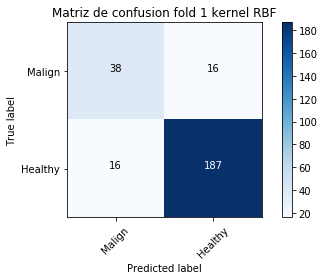

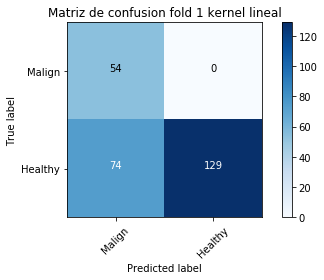

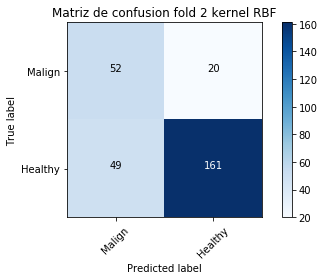

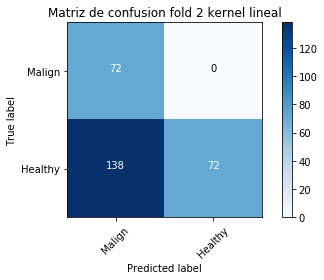

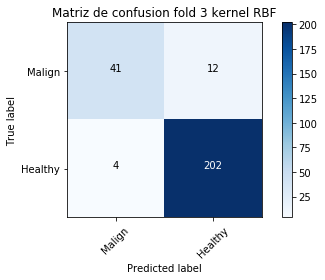

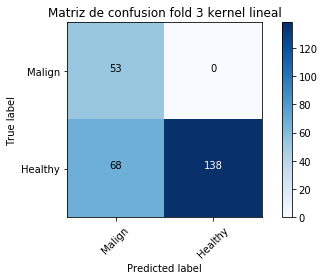

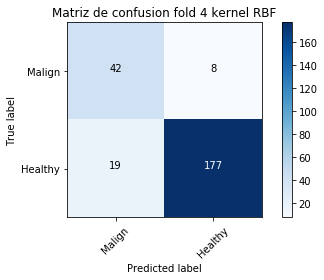

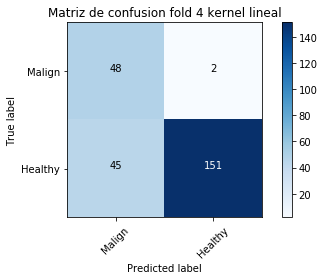

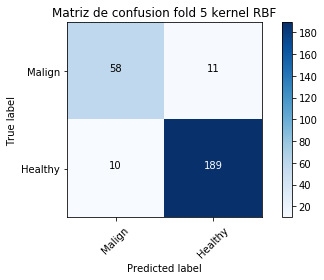

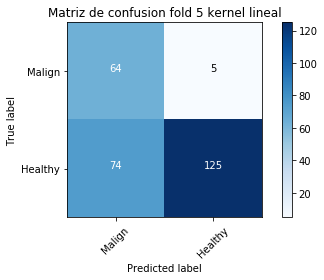

In [4]:
# Defino las semillas para reproducibilidad
np.random.seed(2)
tf.set_random_seed(2)


# 5 Fold Cross Validation
for k in np.arange(0, 5):

    # Creo X_test y las etiquetas y_test, a partir del fold k
    X_test = np.concatenate((Malign_folds[k], Healthy_folds[k]))
    y_test = np.concatenate((Malign_folds_labels[k], Healthy_folds_labels[k]))

    # Para almacenar los resultados
    predicciones_list = []        # kernel RBF
    predicciones_lineal_list = [] # kernel lineal

    # Indices restantes, aparte de k
    iterar = [x for i, x in enumerate(todos_indices) if i!=k]

    # Creo arrays vacios
    enfermos = np.array([]).reshape(0,10)
    sanos = np.array([]).reshape(0,10)

    # Itero los folds que no son test
    for v in iterar:
        # Guardo las muestras con cancer
        enfermos = np.concatenate((Malign_folds[v], enfermos))
        # Guardo todos los sanos
        sanos = np.concatenate((Healthy_folds[v], sanos))

    # Genero 4 particiones para los sanos
    cantidad_filas = sanos.shape[0]
    tam_particion = floor(cantidad_filas / 4)
    # Mezclo los sanos
    np.random.shuffle(sanos)
    
    # Vuelvo a iterar los folds de train
    for i in np.arange(0, 4):
            
        start_slice = 0
        end_slice = 0
        if i == 0:
            start_slice = 0
            end_slice = tam_particion
        elif i == 3:
            start_slice = tam_particion*i
            end_slice = cantidad_filas
        else:
            start_slice = tam_particion*i
            end_slice = tam_particion*i + tam_particion
        
        print("Start_slice: {}, end_slice: {}".format(start_slice, end_slice))
        aux = sanos[start_slice:end_slice,]
        
        # Creo el dataset de train final
        X_train = np.concatenate((enfermos, aux))
        y_train = np.concatenate((np.ones(enfermos.shape[0]), np.ones(aux.shape[0])*-1))
        print("X_train shape {}".format(X_train.shape))
        print("Enfermos {}, sanos {}".format(enfermos.shape[0], aux.shape[0]))

        # Kernel RBF
        # Entreno el modelo
        mGP = gpflow.models.VGP(X_train, y_train.reshape(-1,1), kern = gpflow.kernels.RBF(X_train.shape[1], variance=1.0, lengthscales=1.9),
        likelihood = gpflow.likelihoods.Bernoulli())
        
        # Optimizo
        gpflow.train.ScipyOptimizer().minimize(mGP, maxiter=300)
        
        print(mGP)
        mGP.as_pandas_table()
        
        # Realizo las predicciones sobre test
        pred = mGP.predict_y(X_test)
        pred = np.array(pred[0])
        predicciones_list.append(pred)
        
        # Kernel Lineal
        # Entreno el modelo
        mGPlineal = gpflow.models.VGP(X_train, y_train.reshape(-1,1), kern = gpflow.kernels.Linear(X_train.shape[1]),
        likelihood = gpflow.likelihoods.Bernoulli())
        
        # Optimizo
        gpflow.train.ScipyOptimizer().minimize(mGPlineal, maxiter=300)
        
        print(mGPlineal)
        mGPlineal.as_pandas_table()
        
        # Realizo las predicciones sobre test
        pred_lineal = mGPlineal.predict_y(X_test)
        pred_lineal = np.array(pred_lineal[0])
        predicciones_lineal_list.append(pred_lineal)

    # Calculo el promedio de los 4 modelos
    promedio = np.average(predicciones_list, axis=0)
    promedio_lineal = np.average(predicciones_lineal_list, axis=0)

    # Recodifico el -1 a 0
    y_test[y_test == -1] = 0
    y = y_test

    print("---------------------------------------------------------")
    print("Resultados Fold {}".format(k+1))
    print("---------------------------------------------------------")
    
    # ---------------------------------------------------------
    # Kernel RBF
    # ---------------------------------------------------------
    
    print("**RBF Kernel**")
    
    print("|Métrica|Valor|")
    print("|---|---|")
    
    # calculo AUC de la curva ROC
    aucr = roc_auc_score(y, promedio)
    # calculo roc curve
    fpr, tpr, thresholds = roc_curve(y, promedio)
    print('|AUC ROC| %.3f|' % aucr)
    # Grafico la curva ROC para el modelo
    ax1.plot(fpr, tpr, marker='.', label = "Fold {}".format(k+1))

    # Calculo la curva PR
    precisionf, recallf, thresholds2 = precision_recall_curve(y, promedio)
    # Calculo el área bajo la curva PR
    aucpr = metrics.auc(recallf, precisionf)
    print('|AUC PR|%.3f|' % (aucpr))
    # Grafico la curva PR
    ax2.plot(recallf, precisionf, marker='.', label = "Fold {}".format(k+1))
    
    # Recodifico
    # Utiliza θ=0.5. Si la probabilidad para una instancia de ser cancerígena es menor o
    #igual a θ, clasificarás la instancia como sana (-1), en caso contrario, como
    #cancerígena (1).
    predicciones_binarias = [0 if x <= 0.5 else 1 for x in promedio]
    
    # Calculo la matriz de confusion
    cnf_matrix = metrics.confusion_matrix(y_test, predicciones_binarias, labels=[1, 0])
    
    # Extraigo valores de interes para construir las métricas
    TP, FP, FN, TN = get_confusion_matrix_values(cnf_matrix)
    accuracy, specificity, sensitivity, precision, F_score = get_stats(TP, FP, FN, TN)

    print("|Accuracy|{}|".format(accuracy))
    print("|Specificity|{}|".format(specificity))
    print("|Sensitivity|{}|".format(sensitivity))
    print("|Precision|{}|".format(precision))
    print("|F_score|{}|".format(F_score))
    
    # Grafico la matriz de confusion
    np.set_printoptions(precision=2)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=["Malign", "Healthy"],
                      title='Matriz de confusion fold {} kernel RBF'.format(k+1))
    plt.savefig("CM_kernel_rbf_fold{}.png".format(k+1))
    
    
    # ---------------------------------------------------------
    # Kernel Lineal
    # ---------------------------------------------------------
    
    print("----------------------------------------")
    print("\n")
    print("**Linear Kernel**")
        
    # calculo AUC de la curva ROC
    aucr = roc_auc_score(y, promedio_lineal)
    # calculo roc curve
    fpr, tpr, thresholds = roc_curve(y, promedio_lineal)
    print('|AUC ROC| %.3f|' % aucr)
    # Grafico la curva ROC para el modelo
    ax1lineal.plot(fpr, tpr, marker='.', label = "Fold {}".format(k+1))

    # Calculo la curva PR
    precisionf, recallf, thresholds2 = precision_recall_curve(y, promedio_lineal)
    # Calculo el área bajo la curva PR
    aucpr = metrics.auc(recallf, precisionf)
    # Calculo la precision promedio
    ap = metrics.average_precision_score(y, promedio_lineal)
    print('|AUC PR|%.3f|' % (aucpr))
    # Grafico la curva PR
    ax2lineal.plot(recallf, precisionf, marker='.', label = "Fold {}".format(k+1))
    
    # Recodifico
    # Utiliza θ=0.5. Si la probabilidad para una instancia de ser cancerígena es menor o
    #igual a θ, clasificarás la instancia como sana (-1), en caso contrario, como
    #cancerígena (1).
    predicciones_binarias = [0 if x <= 0.5 else 1 for x in promedio_lineal]
    
    # Calculo la matriz de confusion
    cnf_matrix = metrics.confusion_matrix(y_test, predicciones_binarias, labels=[1, 0])
    
    # Extraigo valores de interes para construir las métricas
    TP, FP, FN, TN = get_confusion_matrix_values(cnf_matrix)
    accuracy, specificity, sensitivity, precision, F_score = get_stats(TP, FP, FN, TN)
    
    print("|Accuracy|{}|".format(accuracy))
    print("|Specificity|{}|".format(specificity))
    print("|Sensitivity|{}|".format(sensitivity))
    print("|Precision|{}|".format(precision))
    print("|F_score|{}|".format(F_score))    
    
    # Grafico la matriz de confusion
    np.set_printoptions(precision=2)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=["Malign", "Healthy"],
                      title='Matriz de confusion fold {} kernel lineal'.format(k+1))
    plt.savefig("CM_kernel_lineal_fold{}.png".format(k+1))
    

# Muestro los fraficos
fig1.show()
fig1.legend(loc='lower right')
fig1.savefig("ROC_kernel_RBF.png")

fig2.show()
fig2.legend(loc='lower left')
fig2.savefig("PR_kernel_RBF.png")

fig1lineal.show()
fig1lineal.legend(loc='lower right')
fig1lineal.savefig("ROC_kernel_linear.png")

fig2lineal.show()
fig2lineal.legend(loc='lower left')
fig2lineal.savefig("PR_kernel_linear.png")

# https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
